<a href="https://colab.research.google.com/github/Nikhil90398/Regression_Models/blob/main/Weather_in_Szeged_RidgeRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Content
The CSV file includes a hourly/daily summary for Szeged, Hungary area, between 2006 and 2016.

Data available in the hourly response:
* time
* summary
* precipType
* temperature
* apparentTemperature
* humidity
* windSpeed
* windBearing
* visibility
* loudCover
* pressure

#PROBLEM
Weather in Szeged `2006-2016` Is there a relationship between humidity and temperature? Can you predict the apparent temperature by other factors

#Step 1 - Download and Explore the Data
The dataset is available as a ZIP file at the following url:

In [ ]:
dataset_url = "https://www.kaggle.com/datasets/budincsevity/szeged-weather"

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nikhilroeewal
Your Kaggle Key: ··········


100%|██████████| 2.23M/2.23M [00:00<00:00, 117MB/s]

In [ ]:
import os
data_dir='/content/szeged-weather'
os.listdir(data_dir)

['weatherHistory.csv']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path= data_dir +"/weatherHistory.csv"
weather=pd.read_csv(path)

In [ ]:
import seaborn as sns
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#The following settings will improve the default style and font sizes for our charts
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
## Here we will check the percentage of nan values present in each feature
feature_with_na=[feature for feature in weather.columns if weather[feature].isnull().sum()>1]

for feature in feature_with_na:
  print(feature, np.round(weather[feature].isnull().mean(), 4)*100,  " % missing values")

Precip Type 0.54  % missing values


list of numerical variables

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in weather.columns if weather[feature].dtypes != "O"]  
print("number of numerical variables: ",len(numerical_features))    
# visualise the numerical columns
weather[numerical_features].head()

number of numerical variables:  8


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


In [ ]:
## Numerical variables are usually of 2 type
## 1 Discrete Variables
discrete_feature=[feature for feature in numerical_features if len(weather[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


In [ ]:
# 2-Continous variable
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 7


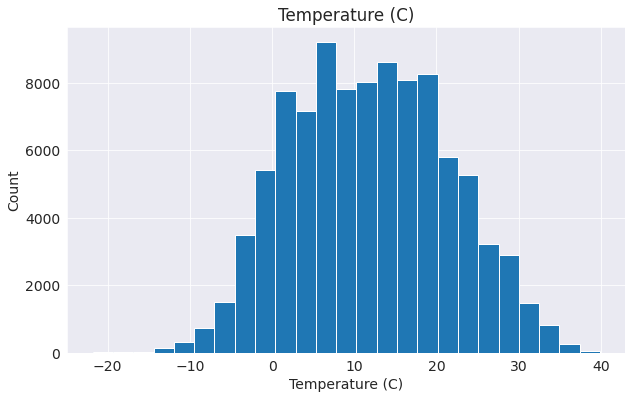

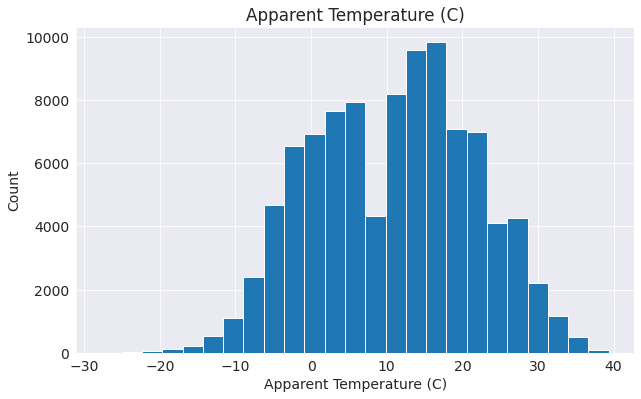

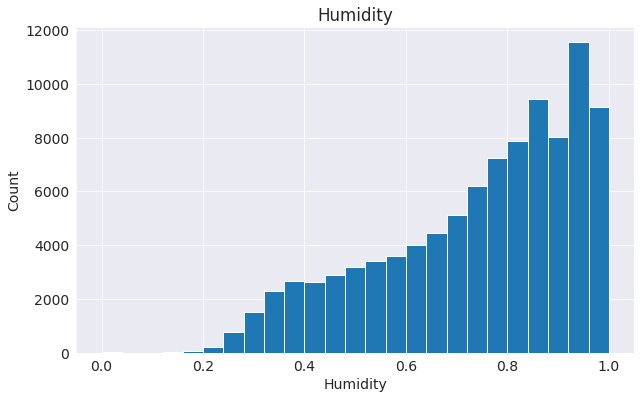

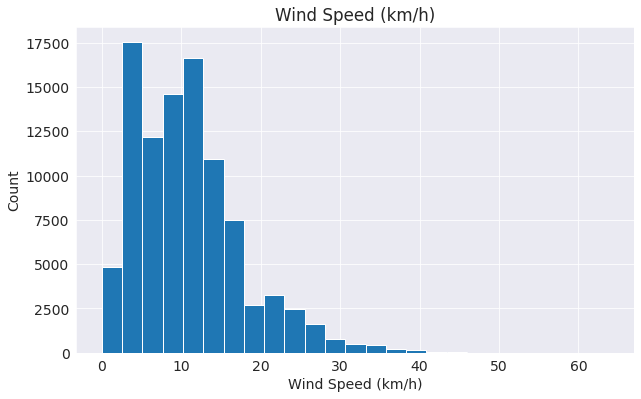

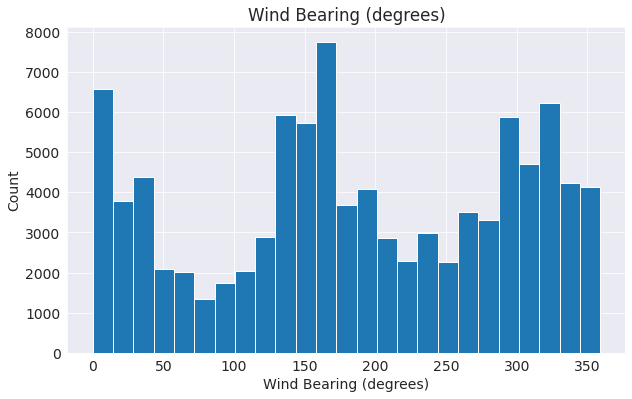

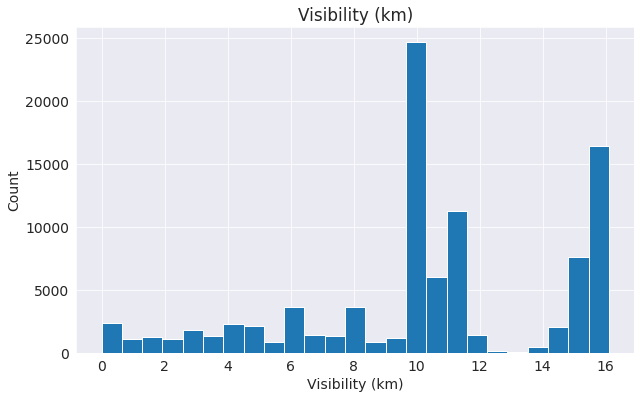

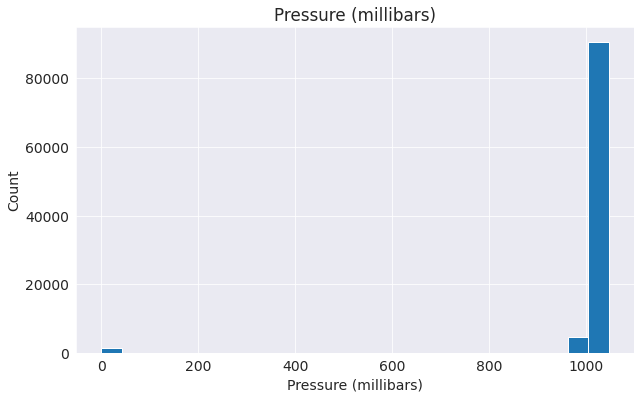

In [ ]:
for feature in continuous_feature:
    data=weather.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

#Step 2 - Prepare the Dataset for Training

##Identify Inputs and Targets

In [ ]:
# drop unnecessary colums
weather=weather.drop(["Formatted Date","Loud Cover"],axis=1)

In [ ]:
weather.columns

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [ ]:
weather=weather[['Summary', 'Precip Type', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Pressure (millibars)', 'Daily Summary','Temperature (C)']]

In [ ]:
inputs_cols =list(weather.columns)[1:-1]
target_cols =list(weather.columns)[-1]

In [ ]:
inputs_df = weather[inputs_cols]
targets_df = weather[target_cols]

##Identify Numeric and Categorical Data
The next step in data preparation is to identify numeric and categorical columns. We can do this by looking at the data type of each column.

In [ ]:
numeric_cols = inputs_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = inputs_df.select_dtypes(include=[object]).columns.tolist()

##Impute Numerical Data
Some of the numeric columns in our dataset contain missing values (nan)

In [ ]:
from sklearn.impute import SimpleImputer
# 1. Create the imputer
imputer=SimpleImputer(strategy = 'mean')
# 2. Fit the imputer to the numeric colums
imputer.fit(inputs_df[numeric_cols])
# 3. Transform and replace the numeric columns
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])

In [ ]:
missing_counts = inputs_df[numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0] # should be an empty list

Series([], dtype: int64)

##Scale Numerical Values
The numeric columns in our dataset have varying ranges.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# 1. create the scaler
scaler = MinMaxScaler()
# 2. Fit the scaler to the numeric colums
scaler.fit(inputs_df[numeric_cols])
# 3. Transform and replace the numeric columns
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

##Encode Categorical Columns
Our dataset contains several categorical columns, each with a different number of categories.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# 1. Create the encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
# 2. Fit the encoder to the categorical colums
encoder.fit(inputs_df[categorical_cols])
# 3. Generate column names for each category
encoded_cols = list(encoder.get_feature_names(categorical_cols))
len(encoded_cols)
# 4. Transform and add new one-hot category columns
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

##Training and Validation Set
Finally, let's split the dataset into a training and validation set. We'll use a randomly select 25% subset of the data for validation. Also, we'll use just the numeric and encoded columns, since the inputs to our model must be numbers.

In [ ]:
from sklearn.model_selection import train_test_split
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs_df[numeric_cols + encoded_cols], 
                                                                        targets_df, 
                                                                        test_size=0.25, 
                                                                        random_state=42)

In [ ]:
train_inputs

## Step 3 - Train a Linear Regression Model

We're now ready to train the model. Linear regression is a commonly used technique for solving [regression problems](https://jovian.ai/aakashns/python-sklearn-logistic-regression/v/66#C6). In a linear regression model, the target is modeled as a linear combination (or weighted sum) of input features. The predictions from the model are evaluated using a loss function like the Root Mean Squared Error (RMSE).


Here's a visual summary of how a linear regression model is structured:

<img src="https://i.imgur.com/iTM2s5k.png" width="480">

However, linear regression doesn't generalize very well when we have a large number of input columns with co-linearity i.e. when the values one column are highly correlated with values in other column(s). This is because it tries to fit the training data perfectly. 

Instead, we'll use Ridge Regression, a variant of linear regression that uses a technique called L2 regularization to introduce another loss term that forces the model to generalize better. Learn more about ridge regression here: https://www.youtube.com/watch?v=Q81RR3yKn30

In [ ]:
from sklearn.linear_model import Ridge

# 1. create a model 
model = Ridge(2)

# Fit the model using inputs and targets
model.fit(train_inputs,train_targets)

Ridge(alpha=2)

`model.fit` uses the following strategy for training the model (source):

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.

<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">

# Step 4 - Make Predictions and Evaluate Your Model

The model is now trained, and we can use it to generate predictions for the training and validation inputs. We can evaluate the model's performance using the RMSE (root mean squared error) loss function.

In [ ]:
train_preds =model.predict(train_inputs)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
# Root mean square error
train_rmse=mean_squared_error(train_targets,train_preds,squared=False)
print('The RMSE loss for the training set is  {} degree celcius.'.format(train_rmse))
# r2_Score
train_r2=r2_score(train_targets,train_preds)
print('The r2_score for the training set is  {} %'.format(train_r2))

The RMSE loss for the training set is  0.9144196364388432 degree celcius.
The r2_score for the training set is  0.9908237841232936 %


In [ ]:
val_preds = model.predict(val_inputs)

In [ ]:
# Root mean square error
val_rmse =mean_squared_error(val_targets,val_preds,squared=False)
print('The RMSE loss for the validation set is {} degree celcius'.format(val_rmse))
# r2_Score
train_r2=r2_score(val_targets,val_preds)
print('The r2_score for the validation set is {} %'.format(train_r2))

The RMSE loss for the validation set is 0.9193994089032597 degree celcius
The r2_score for the validation set is 0.9907668240982128 %


## Feature Importance

Let's look at the weights assigned to different columns, to figure out which columns in the dataset are the most important.

In [ ]:
weights=model.coef_.flatten()

Let's create a dataframe to view the weight assigned to each column.

In [ ]:
weights_df = pd.DataFrame({
    'columns': train_inputs.columns,
    'weight': weights
}).sort_values('weight', ascending=False)

In [ ]:
weights_df

,columns,weight
0,Apparent Temperature (C),58.336919
2,Wind Speed (km/h),5.135213
27,Daily Summary_Breezy starting overnight contin...,1.773100
47,Daily Summary_Foggy starting in the afternoon ...,1.756442
59,Daily Summary_Foggy starting overnight continu...,1.654900
...,...,...
116,Daily Summary_Mostly cloudy throughout the day...,-1.527168
205,Daily Summary_Partly cloudy throughout the day...,-1.598249
144,Daily Summary_Overcast throughout the day and ...,-1.629012
138,Daily Summary_Mostly cloudy until night and br...,-2.519243


##Making Predictions
The model can be used to make predictions on new inputs using the following helper function:

In [ ]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols].values)
    X_input = input_df[numeric_cols + encoded_cols]
    return model.predict(X_input)[0]

##Saving the model
Let's save the model (along with other useful objects) to disk, so that we use it for making predictions without retraining.

In [ ]:
import joblib

In [ ]:
Temperature_predictor = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'inputs_cols': inputs_cols,
    'target_cols': target_cols,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [ ]:
joblib.dump(Temperature_predictor, 'Temperature_predictor.joblib')

['Temperature_predictor.joblib']